In [1]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
camel_1_img=cv2.imread('Horses_Camels/train/camel/1.png')

In [3]:
camel_1_img=cv2.cvtColor(camel_1_img,cv2.COLOR_BGR2RGB)

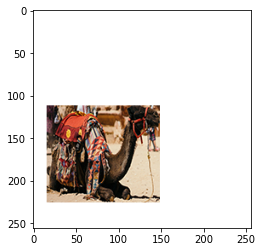

In [4]:
plt.imshow(camel_1_img)

In [5]:
camel_1_img.shape

(256, 256, 3)

In [6]:
horse_1_img=cv2.imread('Horses_Camels/train/horse/1.png')

In [7]:
horse_1_img=cv2.cvtColor(horse_1_img,cv2.COLOR_BGR2RGB)

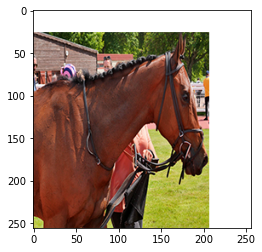

In [8]:
plt.imshow(horse_1_img)

In [9]:
horse_1_img.shape

(256, 256, 3)

In [10]:
#preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                                   zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')

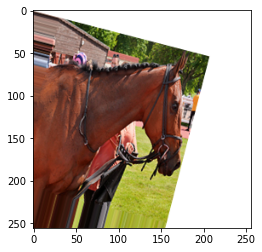

In [12]:
plt.imshow(image_generator.random_transform(horse_1_img))

In [13]:
image_generator.flow_from_directory('Horses_Camels/train')

Found 360 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [15]:
model=Sequential()
#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2D->1D
model.add(Flatten())

#Dense layer
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
#train the model
input_shape=(150,150,3)

In [19]:
batch_size=32
train_image_generator=image_generator.flow_from_directory('Horses_Camels/train',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 360 images belonging to 2 classes.


In [20]:
test_image_generator=image_generator.flow_from_directory('Horses_Camels/test',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 40 images belonging to 2 classes.


In [21]:
#calculate steps_per_epoch and validation_steps
import math
def calculate(n):
    return int(math.ceil((1. * n) / batch_size)) 

steps_per_epoch = calculate(train_image_generator.n)
print('steps_per_epoch ',steps_per_epoch)
validation_steps = calculate(test_image_generator.n)
print('validation_steps ',validation_steps)

steps_per_epoch  12
validation_steps  2


In [22]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [23]:
results=model.fit(train_image_generator,epochs=25,steps_per_epoch=steps_per_epoch,validation_data=test_image_generator,
                           validation_steps=validation_steps)

Epoch 1/25
12/12 [==============================] - 9s 641ms/step - loss: 0.7720 - accuracy: 0.4813 - val_loss: 0.6778 - val_accuracy: 0.6250
Epoch 2/25
12/12 [==============================] - 7s 588ms/step - loss: 0.6887 - accuracy: 0.5568 - val_loss: 0.6526 - val_accuracy: 0.7750
Epoch 3/25
12/12 [==============================] - 8s 651ms/step - loss: 0.6871 - accuracy: 0.5106 - val_loss: 0.6600 - val_accuracy: 0.5750
Epoch 4/25
12/12 [==============================] - 8s 648ms/step - loss: 0.6235 - accuracy: 0.7225 - val_loss: 0.6840 - val_accuracy: 0.7000
Epoch 5/25
12/12 [==============================] - 8s 653ms/step - loss: 0.5809 - accuracy: 0.6838 - val_loss: 0.7276 - val_accuracy: 0.6250
Epoch 6/25
12/12 [==============================] - 8s 676ms/step - loss: 0.6026 - accuracy: 0.6874 - val_loss: 0.6054 - val_accuracy: 0.6500
Epoch 7/25
12/12 [==============================] - 8s 703ms/step - loss: 0.5331 - accuracy: 0.7335 - val_loss: 0.5815 - val_accuracy: 0.7500
Epoch 

In [24]:
model.save('horses_camels_model.h5')

In [25]:
results.history['accuracy']

[0.5027777552604675,
 0.5666666626930237,
 0.5305555462837219,
 0.6833333373069763,
 0.7055555582046509,
 0.7111111283302307,
 0.7527777552604675,
 0.7944444417953491,
 0.7722222208976746,
 0.7805555462837219,
 0.8083333373069763,
 0.7861111164093018,
 0.8222222328186035,
 0.824999988079071,
 0.8388888835906982,
 0.8194444179534912,
 0.8055555820465088,
 0.8166666626930237,
 0.8500000238418579,
 0.8305555582046509,
 0.8444444537162781,
 0.8416666388511658,
 0.7861111164093018,
 0.824999988079071,
 0.8583333492279053]

Text(0.5, 0, 'Epoch')

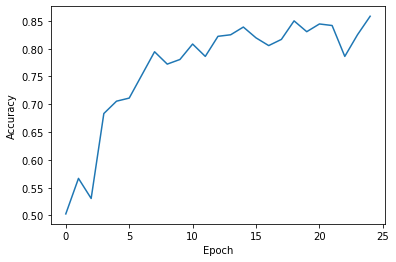

In [26]:
plt.plot(results.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

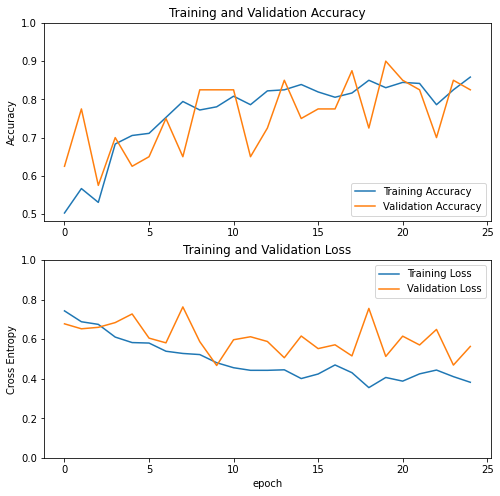

In [27]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
predictions = model.predict(x=test_image_generator,batch_size=10,verbose=0)  

In [29]:
for i in predictions:
    print(i)

[0.3229838]
[0.09810528]
[0.89936084]
[0.01560089]
[0.9864005]
[0.99999976]
[0.33496866]
[0.9793292]
[0.97897446]
[0.03082666]
[0.77290624]
[0.0853532]
[0.8722471]
[0.25649828]
[0.9996459]
[0.27662736]
[0.2881886]
[0.99370027]
[0.36493438]
[0.08303234]
[0.6099475]
[0.98463273]
[0.9898765]
[0.35099185]
[0.1457816]
[0.02270532]
[0.4012647]
[0.41119057]
[0.9476209]
[0.00544602]
[0.9975442]
[0.9779342]
[0.99545956]
[0.30391484]
[0.5785085]
[0.6478907]
[0.0331324]
[0.9218625]
[0.8502286]
[0.97443897]


In [30]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [34]:
import numpy as np
from keras.preprocessing import image

horse_img = 'Horses_Camels/train/horse/178.png'
horse_img = image.load_img(horse_img, target_size=(150, 150))
horse_img = image.img_to_array(horse_img)
horse_img = np.expand_dims(horse_img, axis=0)
horse_img = horse_img/255
prediction_prob_horse = model.predict(horse_img)
print(f'Probability that image is a horse is: {prediction_prob_horse}')

Probability that image is a horse is: [[0.9913012]]


In [43]:
camel_img = 'Horses_Camels/train/camel/178.png'
camel_img = image.load_img(camel_img, target_size=(150, 150))
camel_img = image.img_to_array(camel_img)
camel_img = np.expand_dims(camel_img, axis=0)
camel_img = camel_img/255
prediction_prob_camel = model.predict(camel_img)
print(f'Probability that image is a camel is: {prediction_prob_camel}')

Probability that image is a camel is: [[0.02]]


In [44]:
from sklearn.metrics import classification_report

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

In [46]:
Y_pred = model.predict_generator(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_image_generator.classes, y_pred))
print('Classification Report')
target_names = ['Horse', 'Camel']
print(classification_report(test_image_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0]
 [20  0]]
Classification Report
              precision    recall  f1-score   support

       Horse       0.50      1.00      0.67        20
       Camel       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



Dataset:https://www.kaggle.com/akrsnv/horses-and-camels